In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Installing Dependencies

In [4]:
!pip install monai

In [5]:
!pip install nibabel

## Importing Libraries

In [6]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt 
import os
import torch
from monai.data import DataLoader, Dataset


In [7]:
data_dir = "/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/"
sample_patient = "BraTS20_Training_001"

modalities = {
    "FLAIR": f"{data_dir}{sample_patient}/{sample_patient}_flair.nii",
    "T1": f"{data_dir}{sample_patient}/{sample_patient}_t1.nii",
    "T1ce": f"{data_dir}{sample_patient}/{sample_patient}_t1ce.nii",
    "T2": f"{data_dir}{sample_patient}/{sample_patient}_t2.nii",
}

### Displaying some sample images

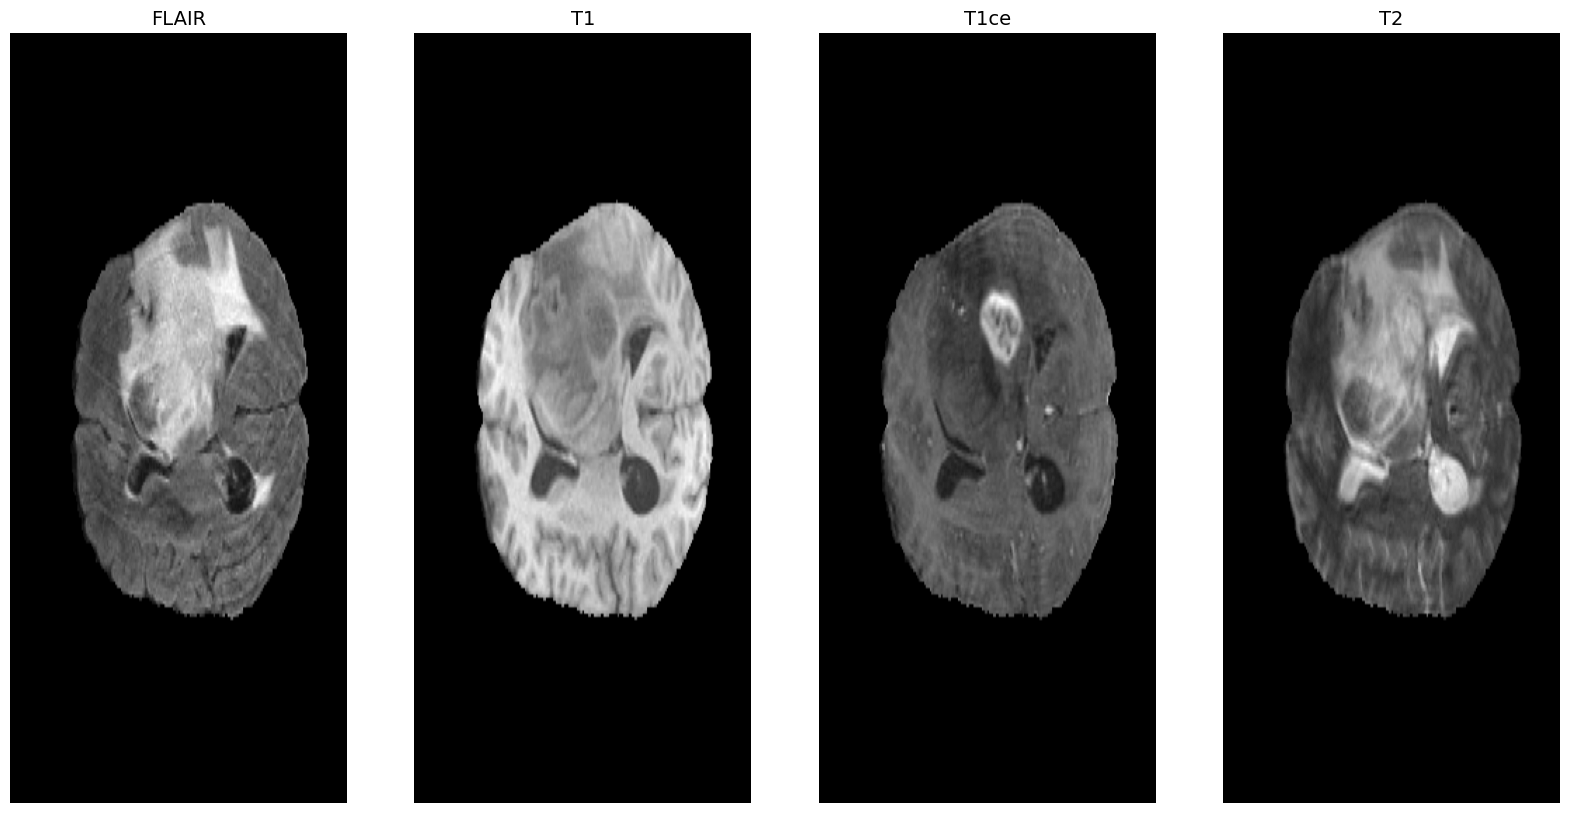

In [11]:
fig, axes = plt.subplots(1,4, figsize=(20,10))
for i, (modality, path) in enumerate(modalities.items()):
    img = nib.load(path).get_fdata()

    mid_slice = img.shape[2] // 2

    axes[i].imshow(img[:, :, mid_slice], cmap="gray", aspect="auto")
    axes[i].set_title(modality, fontsize=14)
    axes[i].axis("off")

plt.show()
    

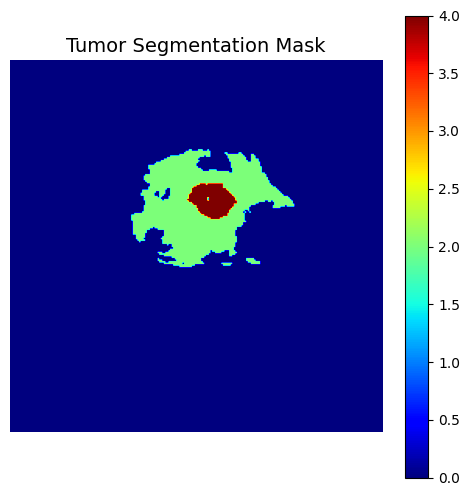

In [14]:
# Load the segmentation mask
seg_path = f"{data_dir}{sample_patient}/{sample_patient}_seg.nii"
seg_img = nib.load(seg_path).get_fdata()

# Plot segmentation mask
plt.figure(figsize=(6,6))
plt.imshow(seg_img[:, :, mid_slice], cmap="jet")  # Use "jet" colormap for segmentation
plt.axis("off")
plt.title("Tumor Segmentation Mask", fontsize=14)
plt.colorbar()
plt.show()


### Viewing 3D

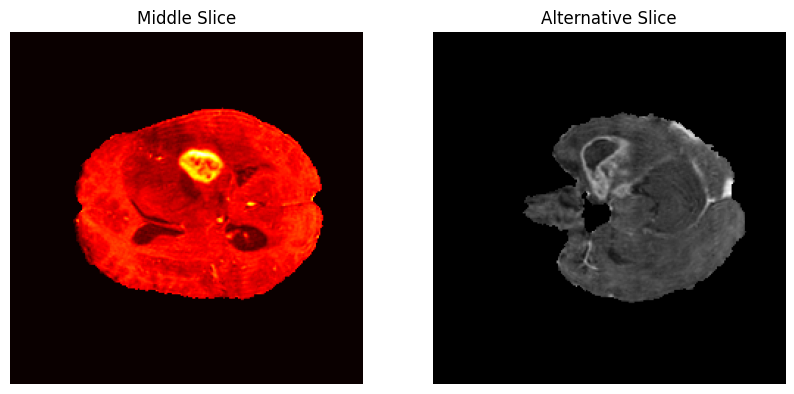

In [40]:
flair_path = f"{data_dir}{sample_patient}/{sample_patient}_t1ce.nii"

img = nib.load(flair_path).get_fdata()

img = (img - np.min(img)) / (np.max(img) - np.min(img))

mid_slice = img.shape[2] // 2  
alt_slice = img.shape[2] // 3  

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img[:, :, mid_slice], cmap="hot")  
axes[0].set_title("Middle Slice")
axes[0].axis("off")

axes[1].imshow(img[:, :, alt_slice], cmap="gray") 
axes[1].set_title("Alternative Slice")
axes[1].axis("off")

plt.show()

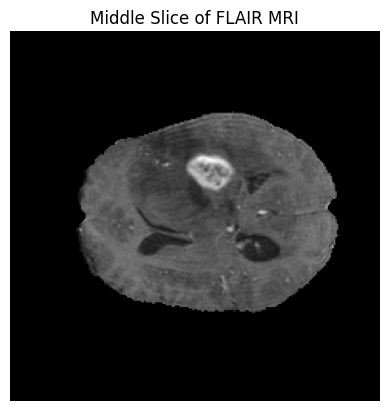

In [41]:
import matplotlib.pyplot as plt

plt.imshow(img[:, :, img.shape[2] // 2], cmap="gray")
plt.title("Middle Slice of FLAIR MRI")
plt.axis("off")
plt.show()


In [44]:
img = nib.load(flair_path).get_fdata()

threshold = np.percentile(img,50)

x,y,z = np.where(img > threshold)

values = img[x,y,z]

#downsample
sample_size = min(5000, len(x))
indices = np.random.choice(len(x), sample_size, replace=False)


x, y, z, values = x[indices], y[indices], z[indices], values[indices]

fig = go.Figure(data=go.Scatter3d(
    x=x, y=y, z=z,
    mode="markers",
    marker=dict(
        size=3,  
        color=values,  
        colorscale="hot", 
        opacity=0.8  
    )    
))

fig.update_layout(
    title="3D MRI Scan Visualization (FLAIR)",
    scene=dict(
        xaxis_title="X",
        yaxis_title="Y",
        zaxis_title="Z"
    )
)

fig.show()